In [42]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("survey_results_public.csv")

In [43]:
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [44]:
df =df[['Country','EdLevel','YearsCodePro','Employment','ConvertedComp']]
df = df.rename({'ConvertedComp':'Salary'},axis=1)
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",27,"Independent contractor, freelancer, or self-em...",NaN
1,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,Employed full-time,NaN
2,Russian Federation,NaN,NaN,NaN,NaN
3,Albania,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,NaN,NaN
4,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,Employed full-time,NaN


In [45]:
#droping the data where the salary is NaN
df = df[df['Salary'].notnull()]
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
7,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13,Employed full-time,116000.0
9,United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,32315.0
10,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Employed full-time,40070.0
11,Spain,Some college/university study without earning ...,7,Employed full-time,14268.0
12,Netherlands,"Secondary school (e.g. American high school, G...",20,Employed full-time,38916.0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34756 entries, 7 to 64154
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       34756 non-null  object 
 1   EdLevel       34188 non-null  object 
 2   YearsCodePro  34621 non-null  object 
 3   Employment    34717 non-null  object 
 4   Salary        34756 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.6+ MB


In [47]:
#dropping the rows which has NaN or null values
df = df.dropna()
df.isnull().sum()  

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [48]:
#here we are only giving preference for people who have are full time analyzed 
df = df[df['Employment'] == 'Employed full-time']
df = df.drop('Employment',axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30019 entries, 7 to 64154
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       30019 non-null  object 
 1   EdLevel       30019 non-null  object 
 2   YearsCodePro  30019 non-null  object 
 3   Salary        30019 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.1+ MB


In [49]:
#here we are getting rid of outliars as countries with 1 developer disturbs our model
df['Country'].value_counts() 

Country
United States     7569
India             2425
United Kingdom    2287
Germany           1903
Canada            1178
                  ... 
Benin                1
Fiji                 1
San Marino           1
Guinea               1
Andorra              1
Name: count, Length: 154, dtype: int64

In [50]:
def shorten_categories(categories,cutoff):
    categorical_map={}
    for i in range(len(categories)):
        if categories.values[i]>=cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'other'
    return categorical_map         

In [51]:
country_map = shorten_categories(df.Country.value_counts(),400)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()

Country
other                 8549
United States         7569
India                 2425
United Kingdom        2287
Germany               1903
Canada                1178
Brazil                 991
France                 972
Spain                  670
Australia              659
Netherlands            654
Poland                 566
Italy                  560
Russian Federation     522
Sweden                 514
Name: count, dtype: int64

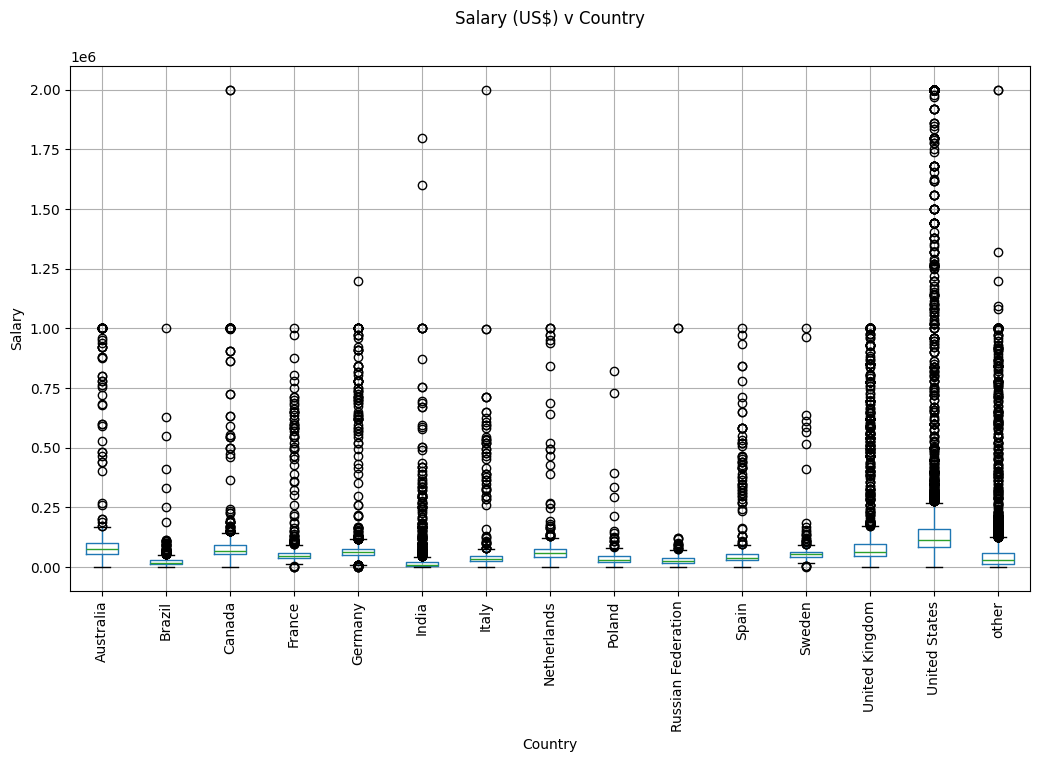

In [52]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title(' ')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()
#As the boxes are the median values so most of the developer are inrange of range of 0.25#
#so we have to remove the outliare that are greater than 0.25

In [53]:
df = df[df['Salary']<=250000]
df = df[df['Salary']>=10000]
df = df[df['Country']!='other']

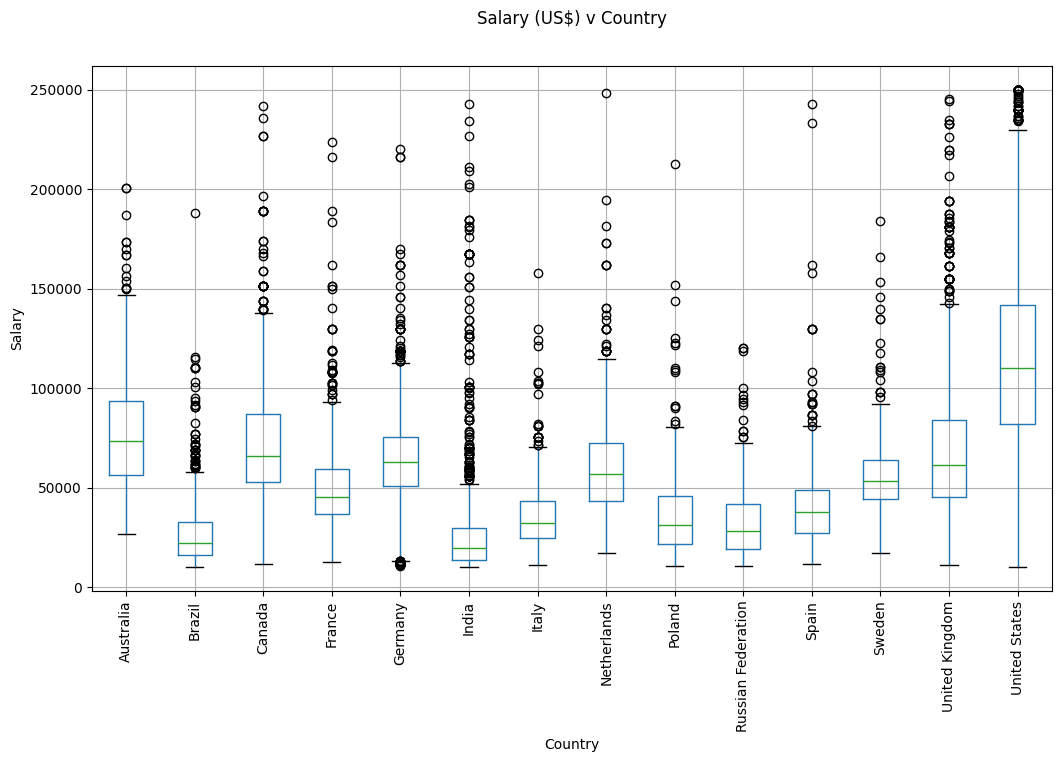

In [54]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title(' ')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [55]:
df['YearsCodePro'].unique()

array(['13', '4', '2', '7', '20', '1', '3', '10', '12', '29', '6', '28',
       '8', '23', '15', '25', '9', '11', 'Less than 1 year', '5', '21',
       '16', '18', '14', '32', '19', '22', '38', '30', '26', '27', '17',
       '24', '34', '35', '33', '36', '40', '39', 'More than 50 years',
       '31', '37', '41', '45', '42', '44', '43', '50', '49'], dtype=object)

In [56]:
def clean_experience(x):
    if x == 'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)
df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)

In [57]:
df['EdLevel'].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'I never completed any formal education',
       'Primary/elementary school'], dtype=object)

In [58]:
def clean_education(x):
    if 'Bachelor’s degree' in x :
        return 'Bachelor’s degree'
    if 'Master’s degree' in x :
        return 'Master’s degree'
    if 'Professional  degree' in x or 'Other doctoral' :
        return 'Post grad'
    return 'Less than a Bachelors'

df['EdLevel'] = df['EdLevel'].apply(clean_education)

In [59]:
df['EdLevel'].unique()

array(['Bachelor’s degree', 'Master’s degree', 'Post grad'], dtype=object)

In [60]:
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
df['EdLevel'] = le_education.fit_transform(df['EdLevel'])
df['EdLevel'].unique()

array([0, 1, 2])

In [61]:
le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])
df['Country'].unique()

array([13, 12, 10,  7,  4,  2,  6,  1,  3,  5, 11,  8,  0,  9])

In [62]:
X = df.drop('Salary',axis=1)
y = df['Salary']

In [63]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X,y.values)

LinearRegression()

In [64]:
y_pred = linear_reg.predict(X)

In [65]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(y, y_pred))

In [66]:
error
#as these value is very high we will bw using another model

39175.110341741645

In [67]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor()
dec_tree_reg.fit(X,y.values)

DecisionTreeRegressor()

In [68]:
y_pred = dec_tree_reg.predict(X)

In [69]:
error = np.sqrt(mean_squared_error(y,y_pred))
print("${:,.02f}".format(error))

$29,778.74


In [70]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor()
random_forest_reg.fit(X,y.values)

RandomForestRegressor()

In [71]:
y_pred = random_forest_reg.predict(X)

In [72]:
error = np.sqrt(mean_squared_error(y,y_pred))
print("${:,.02f}".format(error))

$29,827.05


In [73]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2, 4, 6, 8, 10, 12]
parameters = {'max_depth': max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X, y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [74]:
regressor = gs.best_estimator_

regressor.fit(X,y.values)
y_pred = regressor.predict(X)
error = np.sqrt(mean_squared_error(y,y_pred))
print("${:,.02f}".format(error))
#let's keep this one and continue with it

$30,597.36


In [75]:
X

,Country,EdLevel,YearsCodePro
7,13,0,13.0
9,12,1,4.0
10,12,0,2.0
11,10,2,7.0
12,7,2,20.0
...,...,...,...
64113,13,2,15.0
64116,13,0,6.0
64122,13,2,4.0
64127,13,2,12.0


In [79]:
# country, edlevel, yearscode
X = np.array([["United States", 'Master’s degree', 15 ]])
X

array([['United States', 'Master’s degree', '15']], dtype='<U15')

In [80]:
X[:, 0] = le_country.transform(X[:,0])
X[:, 1] = le_education.transform(X[:,1])
X = X.astype(float)
X

array([[13.,  1., 15.]])

In [81]:
y_pred = regressor.predict(X)
y_pred

C:\Users\suyash\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([139427.26315789])

In [82]:
import pickle

In [83]:
data = {"model": regressor, "le_country": le_country, "le_education": le_education}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [84]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_country = data["le_country"]
le_education = data["le_education"]

In [85]:
y_pred = regressor_loaded.predict(X)
y_pred

C:\Users\suyash\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([139427.26315789])